In [1]:
#Usual imports to create dataframe, plots and to manipulate arrays
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#for our graphs, we'll use the bmh style in matplotlib
plt.style.use('bmh')

In [2]:
#read the data processed during the replication of the figure 2 with the reddit dataset
reddit_data=data = pd.read_csv('reddit_france_posts.csv')

#rename the columns for clarity
reddit_data=reddit_data.rename(columns={'uid': 'id'})

#group by day and hour of the day
daily_activity_reddit = reddit_data.groupby(['weekday','time_hour'],as_index=False)

#create a dataframe with the number of posts and unique users at any given hour of any given day
users_stats_reddit=daily_activity_reddit.nunique()
users_stats_reddit.head()

,weekday,time_hour,Unnamed: 0,id,create_utc,comment_id,local_datetime
0,Friday,0,892,892,891,892,891
1,Friday,1,577,577,577,577,577
2,Friday,2,318,318,318,318,318
3,Friday,3,216,216,216,216,216
4,Friday,4,197,197,197,197,197


In [3]:
#read the data processed during the replication of the figure 2 with the weibo dataset
weibo_data=data = pd.read_csv('Weibo_cyrcadian.csv')

#rename the columns for clarity
weibo_data=weibo_data.rename(columns={'Unnamed: 0': 'post_id','poster_id': 'id'})

#group by day and hour of the day
daily_activity_weibo = weibo_data.groupby(['Weekday','Hour'],as_index=False)

#create a dataframe with the number of posts and unique users at any given hour of any given day
users_stats_weibo=daily_activity_weibo.nunique()
users_stats_weibo.head()

,Weekday,Hour,post_id,id
0,Friday,0,180,114
1,Friday,1,102,57
2,Friday,2,65,43
3,Friday,3,42,33
4,Friday,4,31,27


In [4]:
#read the data processed during the replication of the figure 2 with the twitter dataset
twitter_data=data = pd.read_csv('twitter_fig2.csv')
twitter_data.head()

,Unnamed: 0,weekday,time_hour,id,tweetid,created_at,egoID,utc_offset,local_datetime
0,0,Friday,0,1521,20124,20022,1521,26,19703
1,1,Friday,1,1255,13351,13301,1255,23,13143
2,2,Friday,2,1027,9492,9253,1027,24,9183
3,3,Friday,3,872,7298,7265,872,25,7224
4,4,Friday,4,784,6581,6556,784,23,6524


In [5]:
#read the data processed during the replication of the figure 2 with the stackoverflow dataset
stackoverflow_data_2A=pd.read_csv('stackoverflow_2a.csv')
stackoverflow_data_2A=stackoverflow_data_2A.rename(columns={'id': 'comment_id'})
stackoverflow_data_2B=pd.read_csv('stackoverflow_2b.csv')

#create a new dataset and keep the info on question_id, user id (id) from both precedent datasets
stackoverflow_data=stackoverflow_data_2A.copy()
stackoverflow_data['id']=stackoverflow_data_2B.id
stackoverflow_data.head()

,Unnamed: 0,dayOfWeek,hour,comment_id,id
0,0,Friday,0,3022,1153
1,1,Friday,1,2172,856
2,2,Friday,2,1510,598
3,3,Friday,3,1296,451
4,4,Friday,4,1387,413


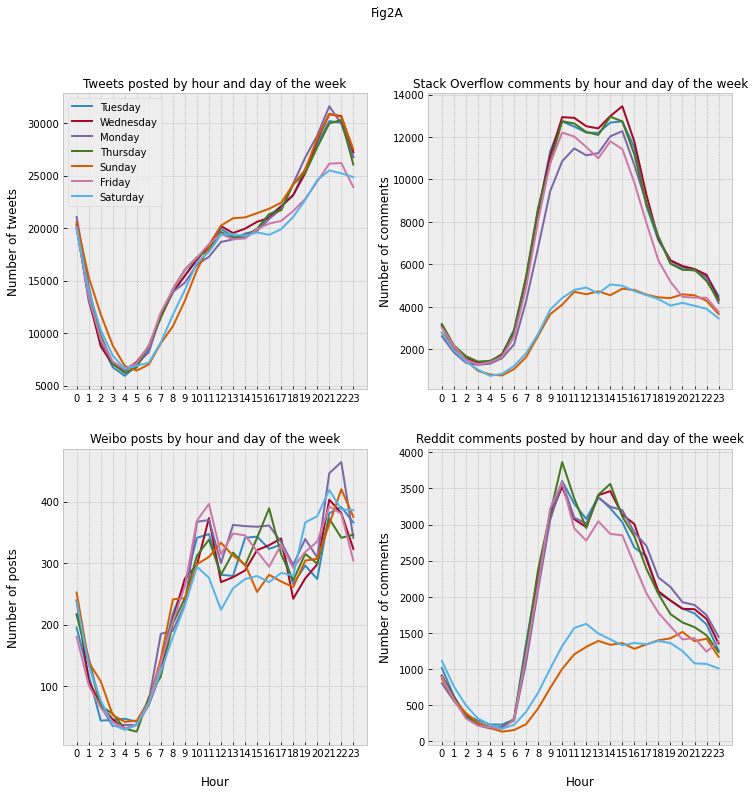

In [6]:
days=reddit_data.weekday.unique()

fig, axs = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Fig2A')

for day in days:
    daily_twitter=twitter_data[twitter_data.weekday==str(day)]
    daily_stackoverflow=stackoverflow_data[stackoverflow_data.dayOfWeek==str(day)]
    daily_weibo=users_stats_weibo[users_stats_weibo.Weekday==str(day)]
    daily_reddit=users_stats_reddit[users_stats_reddit.weekday==str(day)]
    
    axs[0,0].plot(daily_twitter.time_hour,daily_twitter.tweetid,label=str(day))
    axs[0,1].plot(daily_stackoverflow.hour,daily_stackoverflow.comment_id,label=str(day))
    axs[1,0].plot(daily_weibo.Hour,daily_weibo.post_id,label=str(day))
    axs[1,1].plot(daily_reddit.time_hour,daily_reddit.comment_id,label=str(day))
    
    
axs[0,0].set_title('Tweets posted by hour and day of the week',fontsize = 12)
axs[0,0].set_ylabel('Number of tweets')
axs[0,0].yaxis.set_label_coords(-0.14, 0.5)
axs[0,0].set_xticks(np.arange(0, 24, step=1))

axs[0,1].set_title('Stack Overflow comments by hour and day of the week',fontsize = 12)
axs[0,1].set_ylabel('Number of comments')
axs[0,1].yaxis.set_label_coords(-0.12, 0.5)
axs[1,0].set_xticks(np.arange(0, 24, step=1))

axs[1,0].set_title('Weibo posts by hour and day of the week',fontsize = 12)
axs[1,0].set_xlabel('Hour')
axs[1,0].set_ylabel('Number of posts')
axs[1,0].xaxis.set_label_coords(0.5, -0.1)
axs[1,0].yaxis.set_label_coords(-0.14, 0.5)
axs[0,1].set_xticks(np.arange(0, 24, step=1))

axs[1,1].set_title('Reddit comments posted by hour and day of the week',fontsize = 12)
axs[1,1].set_xlabel('Hour')
axs[1,1].set_ylabel('Number of comments')
axs[1,1].xaxis.set_label_coords(0.5, -0.1)
axs[1,1].yaxis.set_label_coords(-0.12, 0.5)
axs[1,1].set_xticks(np.arange(0, 24, step=1))

axs[0,0].legend()


In [27]:
import mpld3
mpld3.display(fig)

C:\Users\CDS\anaconda3\envs\ada\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\CDS\anaconda3\envs\ada\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\CDS\anaconda3\envs\ada\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\CDS\anaconda3\envs\ada\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\CDS\anaconda3\envs\ada\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\CDS\anaconda3\envs\ada\lib\site-pack

In [8]:
import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("fig2a.html","w")
Html_file.write(html_str)
Html_file.close()

C:\Users\CDS\anaconda3\envs\ada\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\CDS\anaconda3\envs\ada\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\CDS\anaconda3\envs\ada\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\CDS\anaconda3\envs\ada\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\CDS\anaconda3\envs\ada\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\CDS\anaconda3\envs\ada\lib\site-pack

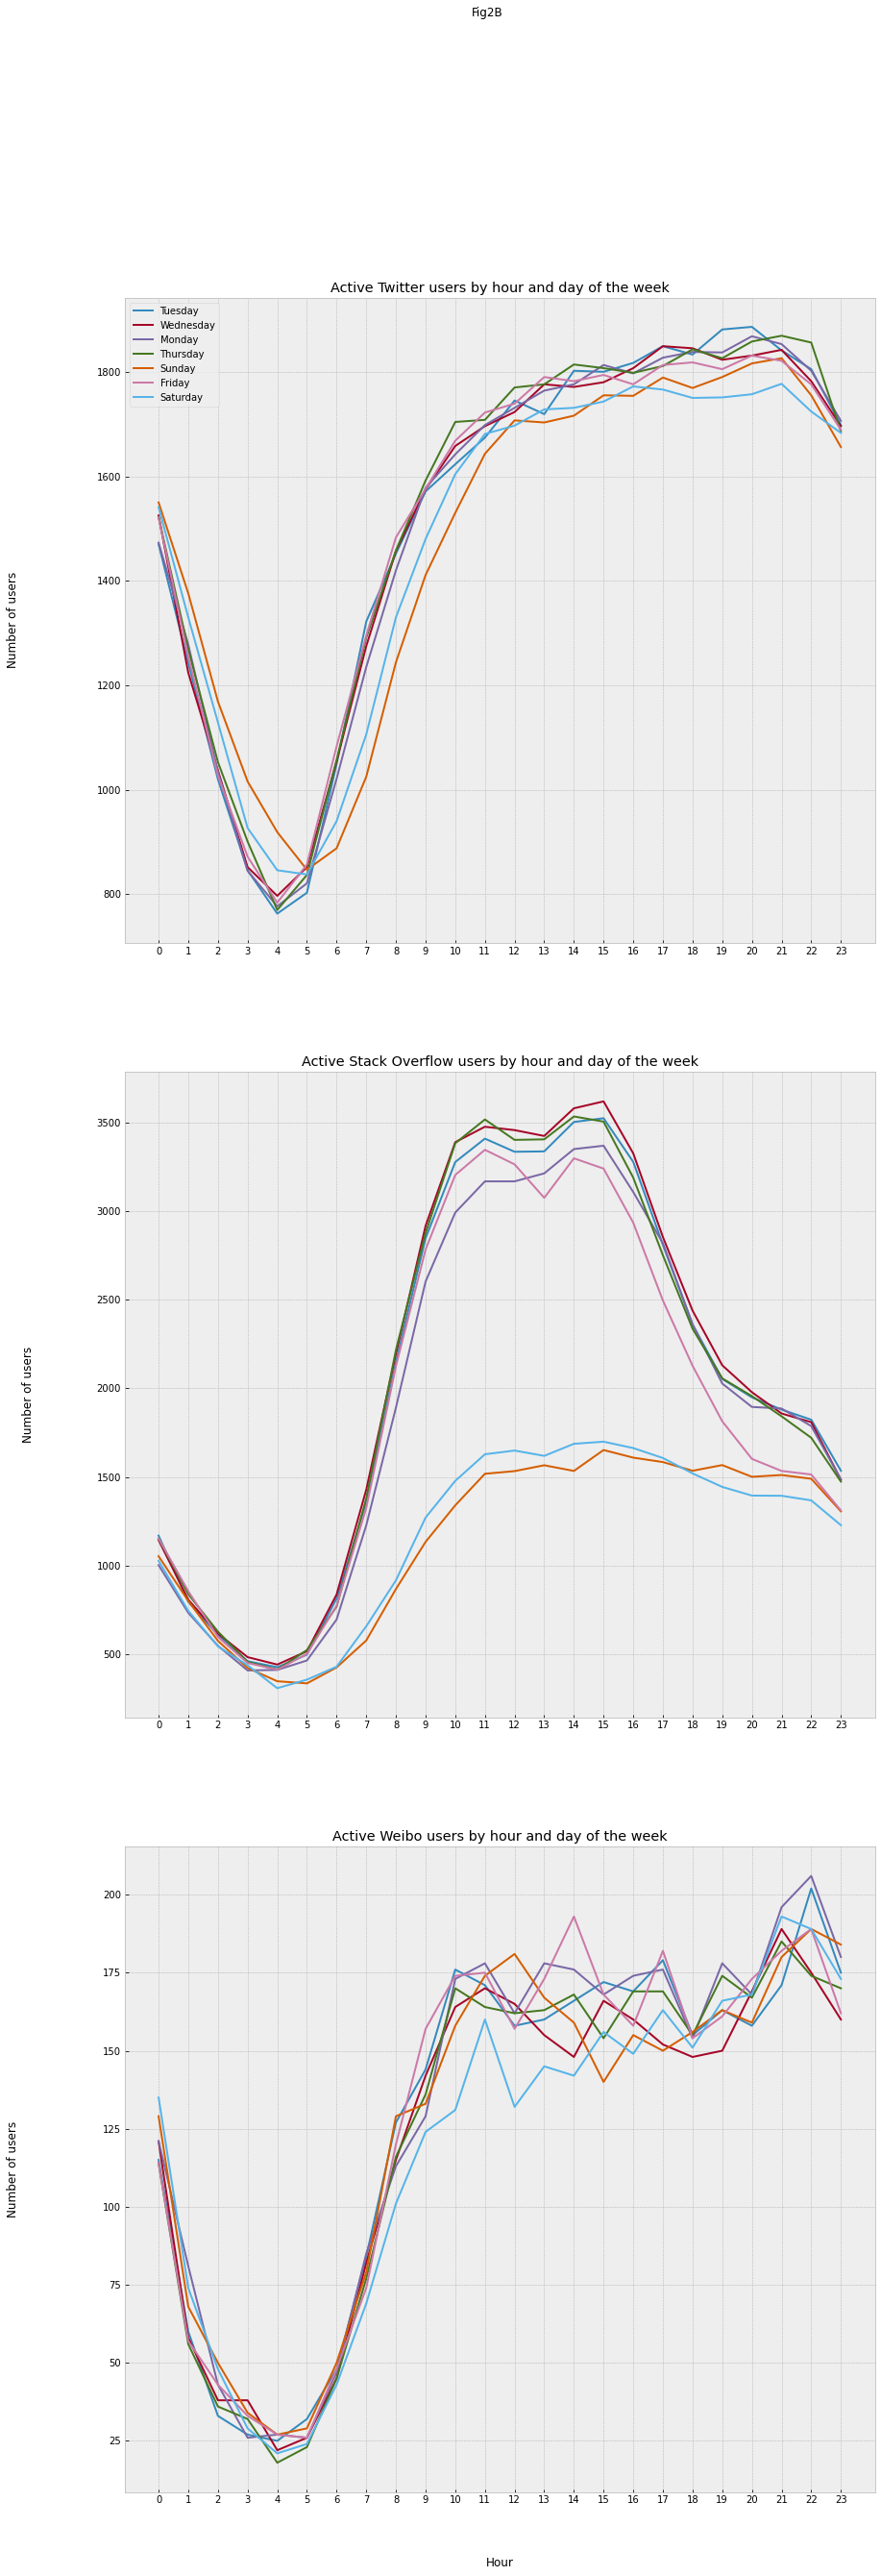

In [32]:
days=reddit_data.weekday.unique()

fig, axs = plt.subplots(3, figsize=(14,42))
fig.suptitle('Fig2B')

for day in days:
    daily_twitter=twitter_data[twitter_data.weekday==str(day)]
    daily_stackoverflow=stackoverflow_data[stackoverflow_data.dayOfWeek==str(day)]
    daily_weibo=users_stats_weibo[users_stats_weibo.Weekday==str(day)]
    daily_reddit=users_stats_reddit[users_stats_reddit.weekday==str(day)]
    
    axs[0].plot(daily_twitter.time_hour,daily_twitter.id,label=str(day))
    axs[1].plot(daily_stackoverflow.hour,daily_stackoverflow.id,label=str(day))
    axs[2].plot(daily_weibo.Hour,daily_weibo.id,label=str(day))
    
    
axs[0].set_title('Active Twitter users by hour and day of the week')
axs[0].set_ylabel('Number of users')
axs[0].yaxis.set_label_coords(-0.14, 0.5)
axs[0].set_xticks(np.arange(0, 24, step=1))

axs[1].set_title('Active Stack Overflow users by hour and day of the week')
axs[1].set_ylabel('Number of users')
axs[1].yaxis.set_label_coords(-0.12, 0.5)
axs[1].set_xticks(np.arange(0, 24, step=1))


axs[2].set_title('Active Weibo users by hour and day of the week')
axs[2].set_xlabel('Hour')
axs[2].set_ylabel('Number of users')
axs[2].xaxis.set_label_coords(0.5, -0.1)
axs[2].yaxis.set_label_coords(-0.14, 0.5)
axs[2].set_xticks(np.arange(0, 24, step=1))

axs[0].legend()

In [33]:
html_str = mpld3.fig_to_html(fig)
Html_file= open("fig2b.html","w")
Html_file.write(html_str)
Html_file.close()

C:\Users\CDS\anaconda3\envs\ada\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\CDS\anaconda3\envs\ada\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\CDS\anaconda3\envs\ada\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\CDS\anaconda3\envs\ada\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\CDS\anaconda3\envs\ada\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\CDS\anaconda3\envs\ada\lib\site-pack

In [11]:
users_stats_weibo

,Weekday,Hour,post_id,id
0,Friday,0,180,114
1,Friday,1,102,57
2,Friday,2,65,43
3,Friday,3,42,33
4,Friday,4,31,27
...,...,...,...,...
163,Wednesday,19,275,150
164,Wednesday,20,298,169
165,Wednesday,21,403,189
166,Wednesday,22,381,175


In [13]:
print(sum(stackoverflow_data.comment_id[stackoverflow_data.hour < 6])/sum(stackoverflow_data.comment_id))
print((sum(stackoverflow_data.comment_id[stackoverflow_data.hour < 12])-sum(stackoverflow_data.comment_id[stackoverflow_data.hour < 6]))/sum(stackoverflow_data.comment_id))
print((sum(stackoverflow_data.comment_id[stackoverflow_data.hour < 18])-sum(stackoverflow_data.comment_id[stackoverflow_data.hour < 12]))/sum(stackoverflow_data.comment_id))
print((sum(stackoverflow_data.comment_id[stackoverflow_data.hour < 24])-sum(stackoverflow_data.comment_id[stackoverflow_data.hour < 18]))/sum(stackoverflow_data.comment_id))

0.07454946075869677
0.297639603242273
0.40673066050565526
0.22108027549337497


In [14]:
print(sum(users_stats_reddit.comment_id[users_stats_reddit.time_hour < 6])/sum(users_stats_reddit.comment_id))
print((sum(users_stats_reddit.comment_id[users_stats_reddit.time_hour < 12])-sum(users_stats_reddit.comment_id[users_stats_reddit.time_hour < 6]))/sum(users_stats_reddit.comment_id))
print((sum(users_stats_reddit.comment_id[users_stats_reddit.time_hour < 18])-sum(users_stats_reddit.comment_id[users_stats_reddit.time_hour < 12]))/sum(users_stats_reddit.comment_id))
print((sum(users_stats_reddit.comment_id[users_stats_reddit.time_hour < 24])-sum(users_stats_reddit.comment_id[users_stats_reddit.time_hour < 18]))/sum(users_stats_reddit.comment_id))

0.06691308243727599
0.289433990442055
0.3947991338112306
0.24885379330943846


In [ ]:
weekday=['Monday','Tuesday','Wednesday', 'Thursday', 'Friday']
weekend=['Saturday','Sunday']

posts=0
posts_sum=0
for day in weekday:
    posts=sum(users_stats_reddit.comment_id[users_stats_reddit.weekday==day])
    posts_sum=posts_sum+posts
weekavg=posts_sum/5
posts=0
posts_sum=0
for day in weekend:
    posts=sum(users_stats_reddit.comment_id[users_stats_reddit.weekday==day])
    posts_sum=posts_sum+posts
weekendavg=posts_sum/2

ratio=weekavg/weekendavg
ratio

In [ ]:
posts=0
posts_sum=0
for day in weekday:
    posts=sum(users_stats_weibo.post_id[users_stats_weibo.Weekday==day])
    posts_sum=posts_sum+posts
weekavg=posts_sum/5
posts=0
posts_sum=0
for day in weekend:
    posts=sum(users_stats_weibo.post_id[users_stats_weibo.Weekday==day])
    posts_sum=posts_sum+posts
weekendavg=posts_sum/2

ratio=weekavg/weekendavg
ratio

In [ ]:
posts=0
posts_sum=0
for day in weekday:
    posts=sum(twitter_data.tweetid[twitter_data.weekday==day])
    posts_sum=posts_sum+posts
weekavg=posts_sum/5
posts=0
posts_sum=0
for day in weekend:
    posts=sum(twitter_data.tweetid[twitter_data.weekday==day])
    posts_sum=posts_sum+posts
weekendavg=posts_sum/2

ratio=weekavg/weekendavg
ratio

In [ ]:
SunThu=['Sunday', 'Monday','Tuesday','Wednesday', 'Thursday']
FriSat=['Friday','Saturday']

posts=0
posts_sum=0
for day in SunThu:
    posts=sum(twitter_data.tweetid[twitter_data.weekday==day])
    posts_sum=posts_sum+posts
weekavg=posts_sum/5
posts=0
posts_sum=0
for day in FriSat:
    posts=sum(twitter_data.tweetid[twitter_data.weekday==day])
    posts_sum=posts_sum+posts
weekendavg=posts_sum/2

ratio=weekavg/weekendavg
ratio

In [ ]:
posts=0
posts_sum=0
for day in weekday:
    posts=sum(stackoverflow_data.question_id[stackoverflow_data.dayOfWeek==day])
    posts_sum=posts_sum+posts
weekavg=posts_sum/5
posts=0
posts_sum=0
for day in weekend:
    posts=sum(stackoverflow_data.question_id[stackoverflow_data.dayOfWeek==day])
    posts_sum=posts_sum+posts
weekendavg=posts_sum/2

ratio=weekavg/weekendavg
ratio